In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Verificação_da_acertividade_dos_modelos.csv')
df = df.drop('Perguntas', axis=1)
df.head()

,deepseek-r1:1.5b,Idioma,deepseek-r1:7b,Idioma.1,deepseek-r1:8b,Idioma.2,deepseek-r1:14b,Idioma.3,mistral-nemo:12b,Idioma.4,...,phi3:3.8b,Idioma.6,phi3:14b,Idioma.7,phi4:14b,Idioma.8,gemma2:2b,Idioma.9,gemma2:9b,Idioma.10
0,1,0,1,0,1,1,1,0,1,1,...,1,0,1,1,1,1,1,1,1,1
1,1,0,1,0,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
3,1,0,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [21]:
def acertividade(df):
    acuracia = []
    for i in df.columns:
        if i == 'Perguntas':
            continue
        else:
            print(f'{i}: {np.mean(df[i])}')
            acuracia.append(np.mean(df[i]))
    return acuracia

In [22]:
model_columns = [col for col in df.columns if 'Idioma' not in col]
acuracias =acertividade(df[model_columns])

<BarContainer object of 11 artists>

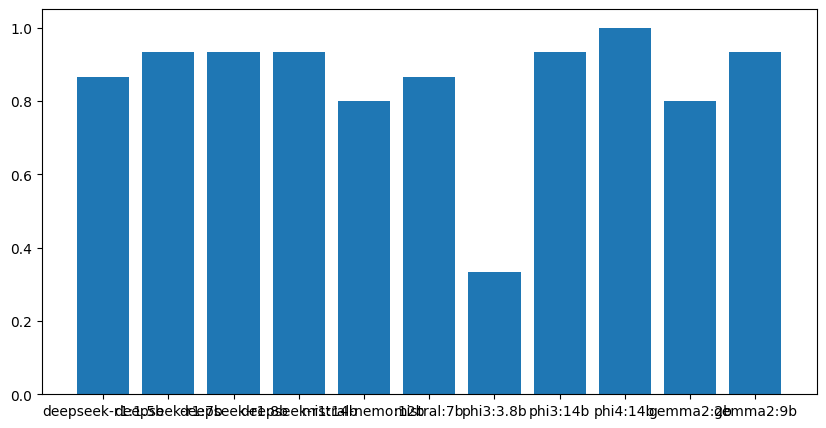

In [29]:
plt.figure(figsize=(10, 5))
plt.bar(model_columns, acuracias)

In [31]:
print(model_columns)

['deepseek-r1:1.5b', 'deepseek-r1:7b', 'deepseek-r1:8b', 'deepseek-r1:14b', 'mistral-nemo:12b', 'mistral:7b', 'phi3:3.8b', 'phi3:14b', 'phi4:14b', 'gemma2:2b', 'gemma2:9b']


In [39]:
bilion_params = [model.split(":")[1].replace("b", "") for model in model_columns]
bilion_params = [float(param) for param in bilion_params]
print(bilion_params)

[1.5, 7.0, 8.0, 14.0, 12.0, 7.0, 3.8, 14.0, 14.0, 2.0, 9.0]


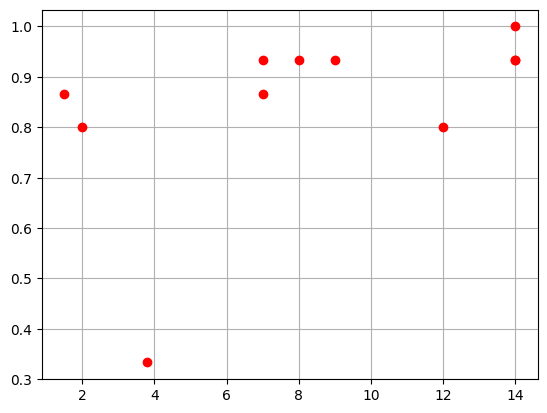

In [41]:
plt.grid()
plt.plot(bilion_params, acuracias, 'ro')